#Assignment

You will use the [Boston Housing Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQ8cbwauNV5rkFP_hFp8-ZEgY_r3ZEQDcFVo0QshmP7Z9dGZaSXRE7nwFLg2wM43zIh2biZ40Cbv4Mh/pub?gid=2001589399&single=true&output=csv) that you have used for previous exercises including the Decision Tree Regressor. See if you can improve your results by using these ensemble methods!

Your task is to create the best possible model to **predict house price**s.

#Try a Decision Tree, Bagged Tree, and Random Forest.

In [ ]:
#Preliminary Steps
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
df = pd.read_csv('/content/9-Boston_Housing_from_Sklearn - Boston_Housing_from_Sklearn.csv')
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [ ]:
#Assign and split
y = df['PRICE']
X = df.drop(columns = 'PRICE')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##Decision Tree

In [ ]:
#make an model instance
dec_tree = DecisionTreeRegressor(random_state = 42)

#fit the model w/ training data
dec_tree.fit(X_train, y_train)

#oredict target value for both training and testing sets
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

#evaluate
train_score = dec_tree.score(X_train, y_train)
test_score =dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.6193230918136841


##Bagged Tree

In [ ]:
#make an model instance
bagreg = BaggingRegressor(random_state = 42)

#fit the model w/ training data
bagreg.fit(X_train, y_train)

#predict target value
bagreg.predict(X_test)

#evaluate
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score =bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9606756023782893
0.8204208271364619


##Random Forest

In [ ]:
#make an model instance
rf = RandomForestRegressor(random_state = 42)

#fit the model w/ training data
rf.fit(X_train, y_train)

#predict target value
rf.predict(X_test)


#evaluate
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9771342521069045
0.8338530730048258


#Tune each model to optimize performance on the test set

After using a loop to tune each model, remember to **create the best version of the model using the best hyperparamete**r values for the model based on the metrics you generated in your loop. The metrics from this best version model are what you will compare to the metrics of the other best version models to determine the overall best model.

##Decision Tree

In [ ]:
# What was the depth of our default tree?
dec_tree.get_depth()

20

In [ ]:
# How many leaf nodes?
dec_tree.get_n_leaves()

360

In [ ]:
#start tuning
depths = list(range(2,20)) #try every value betweeb 2-20

#store the score of each value of max_depth
scores = pd.DataFrame(index=depths, columns=["Test Score", "Train Score"]) 
for depth in depths:
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  dec_tree.fit(X_train, y_train)
  train_score = dec_tree.score(X_train, y_train)
  test_score = dec_tree.score(X_test, y_test)
  scores.loc[depth, "Train Score"] = train_score
  scores.loc[depth, "Test Score"] = test_score

Text(0, 0.5, 'R2')

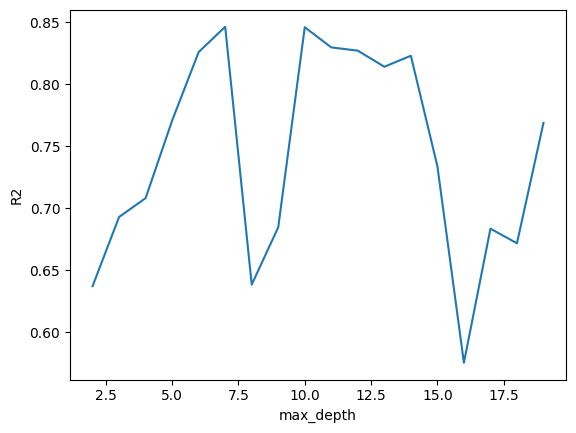

In [ ]:
#make the plot
plt.plot(depths, scores["Test Score"])
plt.xlabel("max_depth")
plt.ylabel("R2")

In [ ]:
#sort to see which max_depth gives best score
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
7,0.846377,0.958517
10,0.84601,0.986796
11,0.829736,0.9911
12,0.827102,0.995358
6,0.825985,0.942742


In [ ]:
#result above suggest max_depth = 7 has the best score
dec_tree_7 = DecisionTreeRegressor(max_depth = 7, random_state = 42) #sorted_scores.index[0]
dec_tree_7.fit(X_train, y_train)
train_7_score = dec_tree_7.score(X_train, y_train)
test_7_score = dec_tree_7.score(X_test, y_test)
print(train_7_score)
print(test_7_score)

0.958516936961625
0.8463768203632204


##Bagged Tree

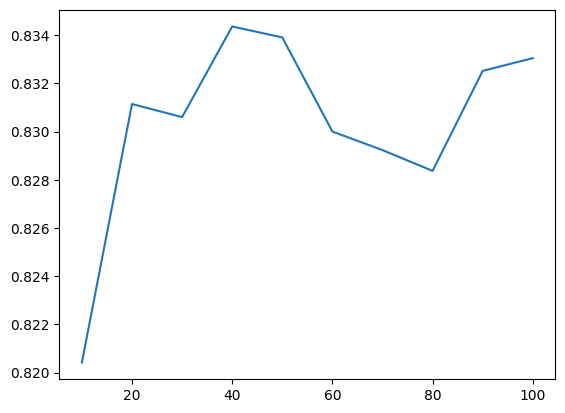

In [ ]:
#list of estimator values
estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#estimators = [10, 50, 100, 250, 500, 1000]
#dataframe to store scores
scores = pd.DataFrame(index=estimators, columns=["Train Score", "Test Score"])

# Iterate through the values to find the best number of estimators
for num_estimators in estimators:
   bag_reg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
   bag_reg.fit(X_train, y_train)
   train_score = bag_reg.score(X_train, y_train)
   test_score = bag_reg.score(X_test, y_test)
   scores.loc[num_estimators, 'Train Score'] = train_score
   scores.loc[num_estimators, 'Test Score'] = test_score

#plot the score
plt.plot(scores['Test Score'])
plt.show()

tried if i expand estimators to [10, 50, 100, 250, 500, 1000] then plot looks like this which suggest I should stick w/ around 100 range

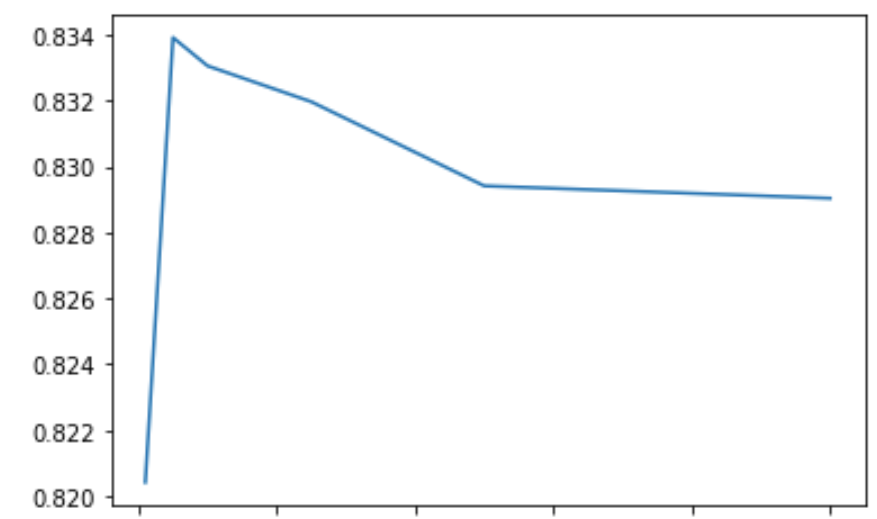



In [ ]:
#sort the scores dataframe by 'Test Score' and retrieve the best value for 'n_estimators'
scores = scores.sort_values(by='Test Score', ascending=False)
scores

,Train Score,Test Score
40,0.97395,0.834365
50,0.975185,0.83391
100,0.977246,0.833051
90,0.976008,0.832522
20,0.9701,0.831147
30,0.973401,0.830604
60,0.976396,0.830005
70,0.976354,0.829234
80,0.976051,0.828372
10,0.960676,0.820421


In [ ]:
# Save the index value of the best test score.
best_n_estimators = scores.index[0]
# Instantiate and fit the best version of the model
bag_reg_tuned = BaggingRegressor(n_estimators=best_n_estimators, random_state=42)
bag_reg_tuned.fit(X_train, y_train)
# Evaluate the model
print(bag_reg_tuned.score(X_train, y_train))
print(bag_reg_tuned.score(X_test, y_test))

0.9739496201366065
0.8343653587501565


##Random Forest

###Tuning the max_depth

In [ ]:
#To see what the depth of each tree in random forest 
#its when the max_depth was unlimited
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

23

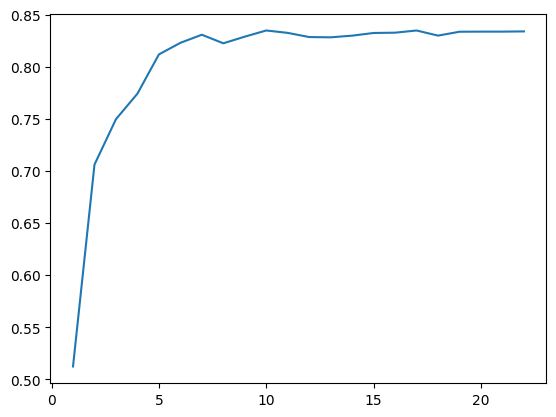

In [ ]:
#similiar strategy from decision tree can be applied here whilst max depth = 23
depths = range(1, 23)
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth, random_state=42)
   model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
   scores.head()

#plot the score
plt.plot(scores["Test Score"])

In [ ]:
#sort our scores dataframe by the test score to see which depth was best
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
10,0.834747,0.973927
17,0.834732,0.977102
22,0.83386,0.977134
20,0.833637,0.977103
21,0.833636,0.977131


In [ ]:
#result above suggest max_depth = 10 has the best score
ran_forest_10 = DecisionTreeRegressor(max_depth = 10, random_state = 42)
ran_forest_10.fit(X_train, y_train)
train_10_score = ran_forest_10.score(X_train, y_train)
test_10_score = ran_forest_10.score(X_test, y_test)
print(train_10_score)
print(test_10_score)

0.9867962386381032
0.8460104271509634


###Tuning n_estimators

represents the number of trees that should be grown

In [ ]:
n_ests = [50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestRegressor(max_depth=10, n_estimators=n) 
   model.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = model.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = model.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
50,0.812592,0.968845
100,0.828489,0.971526
150,0.832743,0.971153
200,0.819924,0.972392
250,0.832216,0.972569


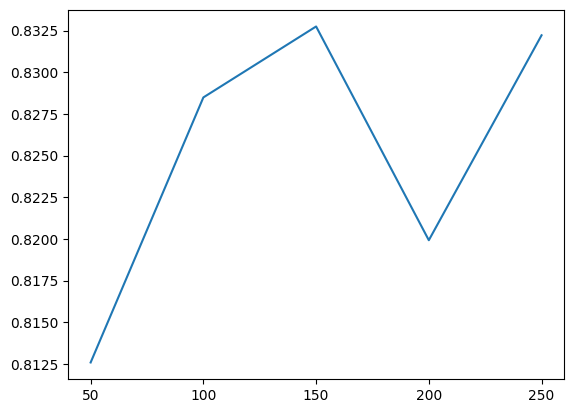

In [ ]:
#plot the result
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);

In [ ]:
#sort the best score
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

,Test Score,Train Score
150,0.832743,0.971153
250,0.832216,0.972569
100,0.828489,0.971526
200,0.819924,0.972392
50,0.812592,0.968845


In [ ]:
best_n_estimators = scores2.index[0]
# Instantiate and fit the best version of the model
#rf_tuned
rf_tuned = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
rf_tuned.fit(X_train, y_train)
# Evaluate the model
print(rf_tuned.score(X_train, y_train))
print(rf_tuned.score(X_test, y_test))

0.9742625841055524
0.8316281564503212


#Evaluate your best model using multiple regression metrics

In [ ]:
print(test_7_score) #from decision tree
print(bag_reg_tuned.score(X_test, y_test)) #from bagged tree
print(test_10_score) #from random forest tuned by max_depth
print(rf_tuned.score(X_test, y_test)) #from random forest tuned by n_est

0.8463768203632204
0.8343653587501565
0.8460104271509634
0.8316281564503212


In [ ]:
#import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

##MAE/MSE/RMSE/R2 on decision tree

In [ ]:
dec_tree_7_train_pred = dec_tree_7.predict(X_train)
dec_tree_7_test_pred = dec_tree_7.predict(X_test)

In [ ]:
#MAE
dt_train_MAE = mean_absolute_error(y_train, dec_tree_7_train_pred)
dt_test_MAE = mean_absolute_error(y_test, dec_tree_7_test_pred)

print(f'Model Training MAE: {dt_train_MAE}')
print(f'Model Testing MAE: {dt_test_MAE}')

Model Training MAE: 1.3467299071381464
Model Testing MAE: 2.4472495639696175


In [ ]:
#MSE
dt_train_MSE = mean_squared_error(y_train, dec_tree_7_train_pred)
dt_test_MSE = mean_squared_error(y_test, dec_tree_7_test_pred)

print(f'Model Training MAE: {dt_train_MSE}')
print(f'Model Testing MAE: {dt_test_MSE}')

Model Training MAE: 3.678789859786468
Model Testing MAE: 10.757792469053147


In [ ]:
#RMSE
dt_train_RMSE=np.sqrt(dt_train_MSE)
dt_test_RMSE=np.sqrt(dt_test_MSE)
print(f'Model Training RMSE: {dt_train_RMSE}')
print(f'Model Testing RMSE: {dt_test_RMSE}')

Model Training RMSE: 1.9180171687934569
Model Testing RMSE: 3.2799073872676874


In [ ]:
#R2
dt_train_r2=r2_score(y_train, dec_tree_7_train_pred)
dt_test_r2=r2_score(y_test, dec_tree_7_test_pred)
print(f'Model Training R2: {dt_train_r2}')
print(f'Model Testing R2: {dt_test_r2}')

Model Training R2: 0.958516936961625
Model Testing R2: 0.8463768203632204


##MAE/MSE/RMSE/R2 on bagged tree

In [ ]:
bag_reg_tuned_train_pred = bag_reg_tuned.predict(X_train)
bag_reg_tuned_test_pred = bag_reg_tuned.predict(X_test)

In [ ]:
#MAE
bt_train_MAE = mean_absolute_error(y_train, bag_reg_tuned_train_pred)
bt_test_MAE = mean_absolute_error(y_test, bag_reg_tuned_test_pred)

print(f'Model Training MAE: {bt_train_MAE}')
print(f'Model Testing MAE: {bt_test_MAE}')

Model Training MAE: 0.9902572559366758
Model Testing MAE: 2.2297834645669288


In [ ]:
#MSE
bt_train_MSE = mean_squared_error(y_train, bag_reg_tuned_train_pred)
bt_test_MSE = mean_squared_error(y_test, bag_reg_tuned_test_pred)

print(f'Model Training MSE: {bt_train_MSE}')
print(f'Model Testing MSE: {bt_test_MSE}')

Model Training MSE: 2.3101927935356197
Model Testing MSE: 11.598920816929132


In [ ]:
#RMSE
bt_train_RMSE=np.sqrt(bt_train_MSE)
bt_test_RMSE=np.sqrt(bt_test_MSE)
print(f'Model Training RMSE: {bt_train_RMSE}')
print(f'Model Testing RMSE: {bt_test_RMSE}')

Model Training RMSE: 1.5199318384505338
Model Testing RMSE: 3.4057188399703713


In [ ]:
#R2
bt_train_r2=r2_score(y_train, bag_reg_tuned_train_pred)
bt_test_r2=r2_score(y_test, bag_reg_tuned_test_pred)
print(f'Model Training R2: {bt_train_r2}')
print(f'Model Testing R2: {bt_test_r2}')

Model Training R2: 0.9739496201366065
Model Testing R2: 0.8343653587501565


##MAE/MSE/RMSE/R2 on random forest - Tuning the max_depth

In [ ]:
dec_tree_10_train_pred = ran_forest_10.predict(X_train)
dec_tree_10_test_pred = ran_forest_10.predict(X_test)

In [ ]:
#MAE
rf_train_MAE = mean_absolute_error(y_train, dec_tree_10_train_pred)
rf_test_MAE = mean_absolute_error(y_test, dec_tree_10_test_pred)

print(f'Model Training MAE: {rf_train_MAE}')
print(f'Model Testing MAE: {rf_test_MAE}')

Model Training MAE: 0.5783096687832835
Model Testing MAE: 2.468874455596897


In [ ]:
#MSE
rf_train_MSE = mean_squared_error(y_train, dec_tree_10_train_pred)
rf_test_MSE = mean_squared_error(y_test, dec_tree_10_test_pred)

print(f'Model Training MSE: {rf_train_MSE}')
print(f'Model Testing MSE: {rf_test_MSE}')

Model Training MSE: 1.1709324204013516
Model Testing MSE: 10.783449939161825


In [ ]:
#RMSE
rf_train_RMSE=np.sqrt(rf_train_MSE)
rf_test_RMSE=np.sqrt(rf_test_MSE)
print(f'Model Training RMSE: {rf_train_RMSE}')
print(f'Model Testing RMSE: {rf_test_RMSE}')

Model Training RMSE: 1.0820963082837645
Model Testing RMSE: 3.2838163680635106


In [ ]:
#R2
rf_train_r2=r2_score(y_train, dec_tree_10_train_pred)
rf_test_r2=r2_score(y_test, dec_tree_10_test_pred)
print(f'Model Training R2: {rf_train_r2}')
print(f'Model Testing R2: {rf_test_r2}')

Model Training R2: 0.9867962386381032
Model Testing R2: 0.8460104271509634


#Explain in a text cell how your model will perform if deployed by referring to the metrics.  Ex. How close can your stakeholders expect its predictions to be to the true value?

In [ ]:
print(f'Decision Tree Model results: {dt_test_MAE}, {dt_test_MSE}, {dt_test_RMSE}, {dt_test_r2}')

Decision Tree Model results: 2.4472495639696175, 10.757792469053147, 3.2799073872676874, 0.8463768203632204


In [ ]:
print(f'Bagged Tree Model results: {bt_test_MAE}, {bt_test_MSE}, {bt_test_RMSE}, {bt_test_r2}')

Bagged Tree Model results: 2.2297834645669288, 11.598920816929132, 3.4057188399703713, 0.8343653587501565


In [ ]:
print(f'Random Forest Model results: {rf_test_MAE}, {rf_test_MSE}, {rf_test_RMSE}, {rf_test_r2}')

Random Forest Model results: 2.468874455596897, 10.783449939161825, 3.2838163680635106, 0.8460104271509634


From model performing results above, Random Forest Model tuned with max_depth has the lowest training MAE, MSE and MRE whilst carries the highest R2 value amongst three models we use.